# Comparing differential-rotation models

- https://docs.sunpy.org/en/stable/generated/gallery/differential_rotation/comparing_rotation_models.html

How to compare differential-rotation models.

The example uses the `sunpy.coordinates.metaframes.RotatedSunFrame` coordinate
metaframe in `sunpy.coordinates` to apply differential rotation to a coordinate.

In [ ]:
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.coordinates import SkyCoord

import sunpy.map
from sunpy.coordinates import HeliographicStonyhurst, RotatedSunFrame
from sunpy.data.sample import AIA_335_IMAGE
from sunpy.sun.constants import sidereal_rotation_rate

First, we use an AIA observation primarily as a pretty background.  We also
define the meridian using a two-element coordinate array of the south pole
and the north pole at zero longitude.

In [ ]:
aiamap = sunpy.map.Map(AIA_335_IMAGE)
meridian = SkyCoord(0*u.deg, [-90, 90]*u.deg, frame=HeliographicStonyhurst,
                    obstime=aiamap.date)

Next, we calculate the sidereal rotation period of the Sun.  This is the
time for a full rotation relative to an inertial reference frame (e.g.,
distant stars), as opposed to the synodic period, which is the apparent
rotation period as seen from an Earth-based observer.  Since the Earth
orbits the Sun in the same direction as the Sun rotates, the Sun appears to
rotate slower for an Earth-based observer.

In [ ]:
sidereal_period = 360*u.deg / sidereal_rotation_rate
sidereal_period

<Quantity 25.37999492 d>

In [ ]:
rotated_meridian = {}
for model in ['howard', 'snodgrass', 'allen', 'rigid']:
    rotated_meridian[model] = SkyCoord(RotatedSunFrame(base=meridian,
                                                       duration=sidereal_period,
                                                       rotation_model=model))

Finally, we plot the differentially rotated meridians over the map, using
`sunpy.map.GenericMap.draw_quadrangle` to conveniently draw a line
of constant longitude in the original frame between two endpoints.  (One
could instead use `astropy.visualization.wcsaxes.WCSAxes.plot_coord`,
but then ``meridian`` would need to consist of a sequence of many points
spanning all latitudes between the two poles to render as desired.)
Note that the "rigid" model appears as the meridian again as expected for a
rotation of exactly one sidereal period.

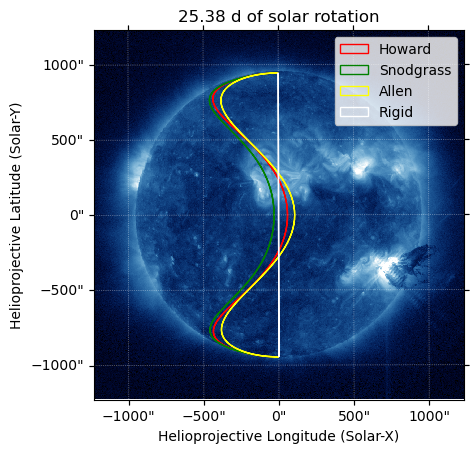

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection=aiamap)
aiamap.plot(axes=ax, clip_interval=(0.5, 99.9)*u.percent)

colors = {
    'howard': 'red',
    'snodgrass': 'green',
    'allen': 'yellow',
    'rigid': 'white',
}
for model, coord in rotated_meridian.items():
    aiamap.draw_quadrangle(coord, axes=ax, edgecolor=colors[model],
                           label=model.capitalize())

ax.legend()
ax.set_title(f'{sidereal_period:.2f} of solar rotation')

plt.show()